## Penguins Veri Seti İncelemesi

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
df = penguins.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Eksik gözlem var mı ?

In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Eksik verilerin ortalama ile doldurulması

In [5]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(df["body_mass_g"].mean())

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

### Cinsiyet değişkeninin eksik verileri en çok tekrarlanan veri ile doldurulması

In [7]:
df["sex"] = df["sex"].fillna(df["sex"].mode()[0])

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Kategorik olan cinsiyet değişkeni numerik değerlere döndürülmesi

In [9]:
df["sex"] = df["sex"].map({'MALE': 0, 'FEMALE': 1})

In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1


### Değişkenler arasındaki korelasyon

In [11]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,-0.322338
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.354374
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,-0.243556
body_mass_g,0.595110,-0.471916,0.871202,1.000000,-0.408210
sex,-0.322338,-0.354374,-0.243556,-0.408210,1.000000


### Verisetindeki değişkenlerin birbirleri arasındaki ilişkinin gösterilmesi

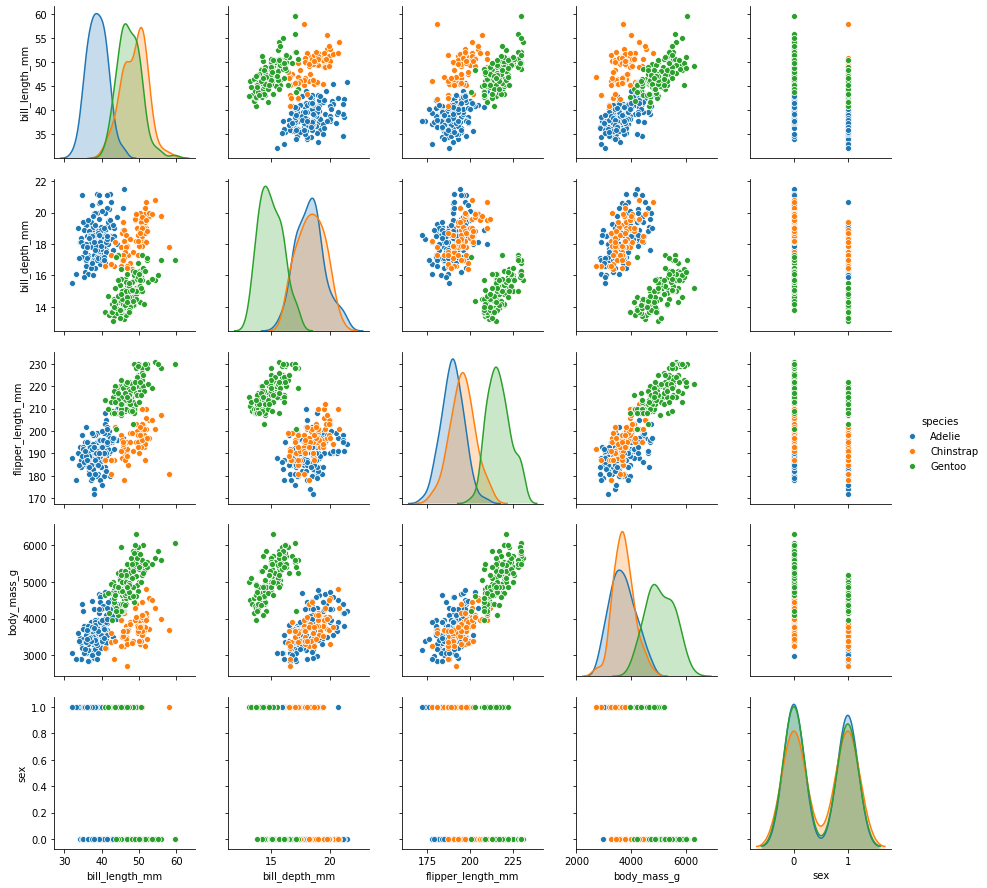

In [12]:
sns.pairplot(df, hue = "species")

### Türlere göre, yüzgeç uzunluğu ile penguenin gagasının üst sırtının uzunluğu arasındaki ilişki

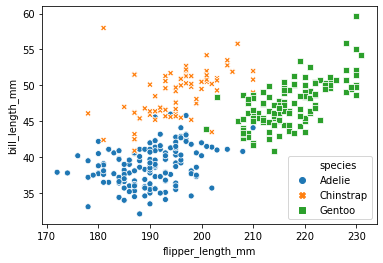

In [13]:
sns.scatterplot(x = "flipper_length_mm", y = "bill_length_mm", hue = "species", style = "species", data = df)

### Türlere göre, yüzgeç uzunluğu ve vücut kütlesi arasındaki ilişki

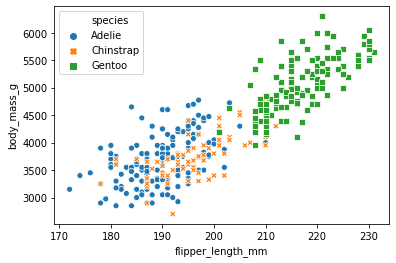

In [14]:
sns.scatterplot(x = "flipper_length_mm", y = "body_mass_g", hue = "species", style = "species", data = df)

### Yüzgeç uzunluğu ile gagasının üst sırtının uzunluğu arasındaki doğrusal ilişkinin gösterimi

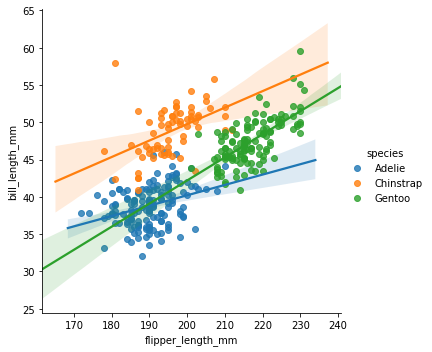

In [15]:
sns.lmplot(x = "flipper_length_mm", y = "bill_length_mm", hue = "species", data = df)